# Machine Learning Model to Predict Possible Teams in the next Superbowl
#### import packages

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#### Import NFL 2012-2022 Dataset

In [5]:
nfl = pd.read_csv('/Users/admin/Desktop/Final_Project/NFL_merged/nfl2012_2022merge.csv')
nfl.head()

,Team,Off Tot/Pts,Off Pts/G,Off RushYds,Off RYds/G,Off PassYds,Off PYds/G,Off TotYds,Off Yds/G,Def Tot/Pts,...,Def PassYds,Def PYds/G,Def TotYds,Def Yds/G,Year,Wins,Losses,Tie,Superbowl,SB Win
0,Arizona Cardinals,250,15.6,1204,75.2,3005,187.8,4209,263.1,357,...,3213,200.8,5405,337.8,2012,5,11,0.0,No,No
1,Atlanta Falcons,419,26.2,1397,87.3,4509,281.8,5906,369.1,299,...,3878,242.4,5849,365.6,2012,13,3,0.0,No,No
2,Baltimore Ravens,398,24.9,1901,118.8,3739,233.7,5640,352.5,344,...,3650,228.1,5615,350.9,2012,10,6,0.0,Yes,Yes
3,Buffalo Bills,344,21.5,2217,138.6,3269,204.3,5486,342.9,435,...,3473,217.1,5806,362.9,2012,6,10,0.0,No,No
4,Carolina Panthers,357,22.3,2088,130.5,3683,230.2,5771,360.7,363,...,3568,223.0,5329,333.1,2012,7,9,0.0,No,No


#### Data Wrangling: Need to Recode the Team column into numeric via mapping

In [6]:
# Define the mapping of team names to numeric codes
team_mapping = {
    'Arizona Cardinals': 0,
    'Atlanta Falcons': 1,
    'Baltimore Ravens': 2,
    'Buffalo Bills': 3,
    'Carolina Panthers': 4,
    'Chicago Bears': 5,
    'Cincinnati Bengals': 6,
    'Cleveland Browns': 7,
    'Dallas Cowboys': 8,
    'Denver Broncos': 9,
    'Detroit Lions': 10,
    'Green Bay Packers': 11,
    'Houston Texans': 12,
    'Indianapolis Colts': 13,
    'Jacksonville Jaguars': 14,
    'Kansas City Chiefs': 15,
    'Las Vegas Raiders': 16,
    'Los Angeles Chargers': 17,
    'Los Angeles Rams': 18,
    'Miami Dolphins': 19,
    'Minnesota Vikings': 20,
    'New England Patriots': 21,
    'New Orleans Saints': 22,
    'New York Giants': 23,
    'New York Jets': 24,
    'Philadelphia Eagles': 25,
    'Pittsburgh Steelers': 26, 
    'San Francisco 49ers': 27,
    'Seattle Seahawks': 28,
    'Tampa Bay Buccaneers': 29,
    'Tennessee Titans': 30,
    'Washington Commanders': 31
    
}


In [7]:
# Define the predictor variables
statpredictors = ['Off Tot/Pts', 'Off PassYds', 'Off RushYds',
              'Wins', 'Losses', 'Def Tot/Pts', 'Def PassYds', 'Def RushYds']

# Create the feature matrix and target variable
X = nfl[statpredictors]
y = nfl['Team']

# Define the mapping of team names to numeric codes
team_mapping = {
    'Arizona Cardinals': 0,
    'Atlanta Falcons': 1,
    'Baltimore Ravens': 2,
    'Buffalo Bills': 3,
    'Carolina Panthers': 4,
    'Chicago Bears': 5,
    'Cincinnati Bengals': 6,
    'Cleveland Browns': 7,
    'Dallas Cowboys': 8,
    'Denver Broncos': 9,
    'Detroit Lions': 10,
    'Green Bay Packers': 11,
    'Houston Texans': 12,
    'Indianapolis Colts': 13,
    'Jacksonville Jaguars': 14,
    'Kansas City Chiefs': 15,
    'Las Vegas Raiders': 16,
    'Los Angeles Chargers': 17,
    'Los Angeles Rams': 18,
    'Miami Dolphins': 19,
    'Minnesota Vikings': 20,
    'New England Patriots': 21,
    'New Orleans Saints': 22,
    'New York Giants': 23,
    'New York Jets': 24,
    'Philadelphia Eagles': 25,
    'Pittsburgh Steelers': 26, 
    'San Francisco 49ers': 27,
    'Seattle Seahawks': 28,
    'Tampa Bay Buccaneers': 29,
    'Tennessee Titans': 30,
    'Washington Commanders': 31
    
}

# Recode the target variable to numeric codes
y_encoded = y.map(team_mapping)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=123)

# Train a random forest classifier
Superbowlmodel = RandomForestClassifier(n_estimators=100)
Superbowlmodel.fit(X_train, y_train)

# Make predictions on the test set
Superbowlpredictions = Superbowlmodel.predict(X_test)

# Evaluate the model
cm = confusion_matrix(y_test, Superbowlpredictions)
print(cm)

[[0 0 1 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


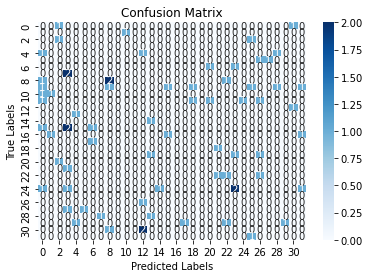

In [8]:
# Create a confusion matrix heatmap
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [9]:
# Generate the classification report
report = classification_report(y_test, Superbowlpredictions)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         1
           2       0.33      0.50      0.40         2
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         2
           8       0.50      0.50      0.50         4
           9       0.00      0.00      0.00         7
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         5
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         4
          16       0.00      0.00      0.00         3
          17       0.00    

/Users/admin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/admin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/admin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/admin/opt/anaconda3/

### Model Analysis
#### This model is not very accurate at all with accuracy at 6%. This would probably in up in a very off prediction of superbowl teams. 

### Running another Random Forest Model with just Offense Predictors

In [38]:
# Define the predictor variables
off_predictors = ['Off Tot/Pts', 'Off PassYds', 'Off RushYds', 'Off Tot/Pts', 'Off PYds/G', 'Off RYds/G',
              'Off Pts/G','Wins', 'Losses']

# Create the feature matrix and target variable
X = nfl[off_predictors]
y = nfl['Team']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=123)

# Train a random forest classifier
Offensemodel = RandomForestClassifier(n_estimators=100)
Offensemodel.fit(X_train, y_train)

# Make predictions on the test set
SBpredictions = Offensemodel.predict(X_test)

# Evaluate the model
cm2 = confusion_matrix(y_test, SBpredictions)
print(cm2)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


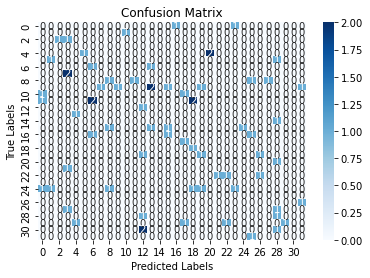

In [39]:
# Create a confusion matrix heatmap
sns.heatmap(cm2, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [40]:
# Generate the classification report
report = classification_report(y_test, SBpredictions)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         1
           2       1.00      0.50      0.67         2
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         2
           6       0.25      0.50      0.33         2
           7       0.00      0.00      0.00         2
           8       0.33      0.25      0.29         4
           9       1.00      0.14      0.25         7
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         5
          12       0.20      1.00      0.33         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          15       0.33      0.25      0.29         4
          16       0.00      0.00      0.00         3
          17       0.33    

/Users/admin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/admin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/admin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/admin/opt/anaconda3/

In [41]:
# Define the team names
team_names = [
    'Arizona Cardinals', 'Atlanta Falcons', 'Baltimore Ravens', 'Buffalo Bills', 'Carolina Panthers',
    'Chicago Bears', 'Cincinnati Bengals', 'Cleveland Browns', 'Dallas Cowboys', 'Denver Broncos',
    'Detroit Lions', 'Green Bay Packers', 'Houston Texans', 'Indianapolis Colts', 'Jacksonville Jaguars',
    'Kansas City Chiefs', 'Las Vegas Raiders', 'Los Angeles Chargers', 'Los Angeles Rams', 'Miami Dolphins',
    'Minnesota Vikings', 'New England Patriots', 'New Orleans Saints', 'New York Giants', 'New York Jets',
    'Philadelphia Eagles', 'Pittsburgh Steelers', 'San Francisco 49ers', 'Seattle Seahawks',
    'Tampa Bay Buccaneers', 'Tennessee Titans', 'Washington Commanders'
]

# Print classification report with team names
print(classification_report(y_test, SBpredictions, target_names=team_names))

                       precision    recall  f1-score   support

    Arizona Cardinals       0.00      0.00      0.00         2
      Atlanta Falcons       0.00      0.00      0.00         1
     Baltimore Ravens       1.00      0.50      0.67         2
        Buffalo Bills       0.00      0.00      0.00         0
    Carolina Panthers       0.00      0.00      0.00         3
        Chicago Bears       0.00      0.00      0.00         2
   Cincinnati Bengals       0.25      0.50      0.33         2
     Cleveland Browns       0.00      0.00      0.00         2
       Dallas Cowboys       0.33      0.25      0.29         4
       Denver Broncos       1.00      0.14      0.25         7
        Detroit Lions       0.00      0.00      0.00         2
    Green Bay Packers       0.00      0.00      0.00         5
       Houston Texans       0.20      1.00      0.33         1
   Indianapolis Colts       0.00      0.00      0.00         1
 Jacksonville Jaguars       0.00      0.00      0.00  

/Users/admin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/admin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/admin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/admin/opt/anaconda3/

### Model Analysis
#### This model has jumped up in accuracy to 21% from 7% accuracy. This still isn't a great accuracy for prediciton but it is a better model than the first. 

Off RYds/G     0.131944
Off RushYds    0.130160
Off PYds/G     0.123503
Off PassYds    0.123140
Off Tot/Pts    0.114010
Off Tot/Pts    0.112048
Off Pts/G      0.111382
Wins           0.079029
Losses         0.074784
dtype: float64


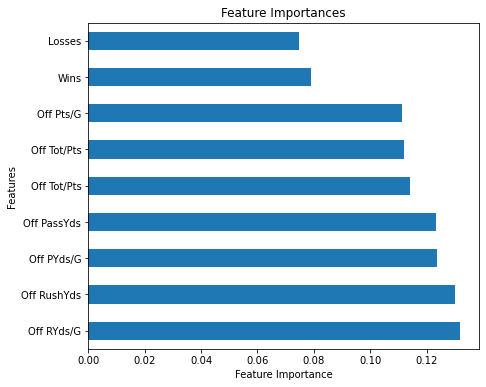

In [43]:
feature_importances = pd.Series(Offensemodel.feature_importances_, index=X.columns)
feature_importances
feature_importances.sort_values(inplace=True, ascending=False)
print(feature_importances)
feature_importances.plot(kind='barh', figsize=(7,6))
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()

## Running the same Random Forest Model but adding the Year column in to see if the accuracy increases. 

In [44]:
# Define the predictor variables
offense_yr = ['Off Tot/Pts', 'Off PassYds', 'Off RushYds', 'Off Tot/Pts', 'Off PYds/G', 'Off RYds/G',
              'Off Pts/G','Wins', 'Losses', 'Year']

# Create the feature matrix and target variable
X = nfl[offense_yr]
y = nfl['Team']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=123)

# Train a random forest classifier
Offyearmodel = RandomForestClassifier(n_estimators=100)
Offyearmodel.fit(X_train, y_train)

# Make predictions on the test set
SB_offyear_predict = Offyearmodel.predict(X_test)

# Evaluate the model
cm3 = confusion_matrix(y_test, SB_offyear_predict)
print(cm3)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


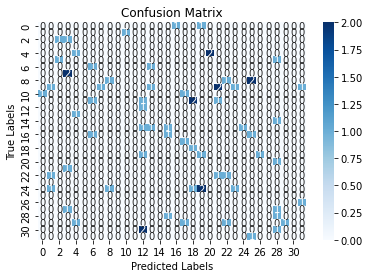

In [45]:
# Create a confusion matrix heatmap
sns.heatmap(cm3, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [46]:
# Generate the classification report
report = classification_report(y_test, SB_offyear_predict)
print(classification_report(y_test, SB_offyear_predict, target_names=team_names))

                       precision    recall  f1-score   support

    Arizona Cardinals       0.00      0.00      0.00         2
      Atlanta Falcons       0.00      0.00      0.00         1
     Baltimore Ravens       0.50      0.50      0.50         2
        Buffalo Bills       0.00      0.00      0.00         0
    Carolina Panthers       0.33      0.33      0.33         3
        Chicago Bears       0.00      0.00      0.00         2
   Cincinnati Bengals       0.33      0.50      0.40         2
     Cleveland Browns       0.00      0.00      0.00         2
       Dallas Cowboys       0.50      0.25      0.33         4
       Denver Broncos       0.00      0.00      0.00         7
        Detroit Lions       0.00      0.00      0.00         2
    Green Bay Packers       0.00      0.00      0.00         5
       Houston Texans       0.17      1.00      0.29         1
   Indianapolis Colts       0.00      0.00      0.00         1
 Jacksonville Jaguars       0.00      0.00      0.00  

/Users/admin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/admin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/admin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/admin/opt/anaconda3/

### Model Analysis
#### This model is at 18% accuracy. Adding the year actually took away from the accuracy instead of making it better.

### Assessing Features Importance

Off RYds/G     0.118770
Off RushYds    0.116054
Off PYds/G     0.115554
Off PassYds    0.113815
Off Tot/Pts    0.105863
Off Tot/Pts    0.100987
Off Pts/G      0.100014
Year           0.084786
Wins           0.073129
Losses         0.071028
dtype: float64


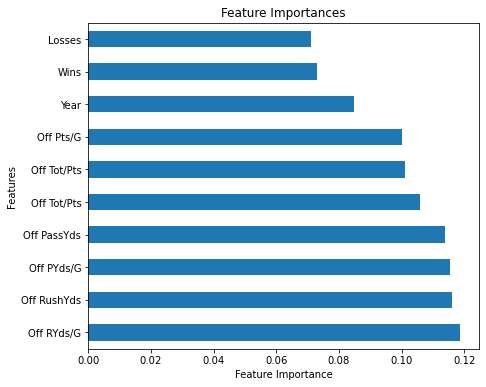

In [48]:
feature_importances = pd.Series(Offyearmodel.feature_importances_, index=X.columns)
feature_importances
feature_importances.sort_values(inplace=True, ascending=False)
print(feature_importances)
feature_importances.plot(kind='barh', figsize=(7,6))
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()

## Perform a Random Forest Model with all variables in dataset to test for higher accuracy in prediction. 

In [49]:
# Recode the Superbowl to numeric
def superbowl (series): 
    if series == "No":
        return 0
    if series == "Yes": 
        return 1
nfl['SuperbowlR'] = nfl['Superbowl'].apply(superbowl)


In [50]:
# Define the predictor variables (did not use Tie or SB Wins Variable)
allstats = ['Off Tot/Pts', 'Off PassYds', 'Off RushYds', 'Off PYds/G', 'Off RYds/G', 'Off TotYds', 
              'Off Pts/G', 'Off Yds/G', 'Wins', 'Losses', 'Year', 'Def Tot/Pts', 'Def PassYds', 'Def RushYds', 
             'Def Tot/Pts', 'Def PYds/G', 'Def RYds/G', 'Def Pts/G', 'Def TotYds', 'Def Yds/G', 'SuperbowlR']

# Create the feature matrix and target variable
X = nfl[allstats]
y = nfl['Team']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=123)

# Train a random forest classifier
allstatsmodel = RandomForestClassifier(n_estimators=100)
allstatsmodel.fit(X_train, y_train)

# Make predictions on the test set
allstats_predict = allstatsmodel.predict(X_test)

# Evaluate the model
cm4 = confusion_matrix(y_test, allstats_predict)
print(cm4)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 1 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


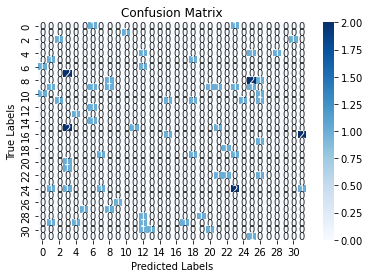

In [51]:
# Create a confusion matrix heatmap
sns.heatmap(cm4, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [52]:
# Generate the classification report
report4 = classification_report(y_test, allstats_predict)
print(classification_report(y_test, allstats_predict, target_names=team_names))

                       precision    recall  f1-score   support

    Arizona Cardinals       0.00      0.00      0.00         2
      Atlanta Falcons       0.00      0.00      0.00         1
     Baltimore Ravens       0.50      0.50      0.50         2
        Buffalo Bills       0.00      0.00      0.00         0
    Carolina Panthers       0.00      0.00      0.00         3
        Chicago Bears       0.00      0.00      0.00         2
   Cincinnati Bengals       0.00      0.00      0.00         2
     Cleveland Browns       0.00      0.00      0.00         2
       Dallas Cowboys       0.33      0.25      0.29         4
       Denver Broncos       0.00      0.00      0.00         7
        Detroit Lions       0.00      0.00      0.00         2
    Green Bay Packers       0.00      0.00      0.00         5
       Houston Texans       0.00      0.00      0.00         1
   Indianapolis Colts       0.00      0.00      0.00         1
 Jacksonville Jaguars       0.00      0.00      0.00  

/Users/admin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/admin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/admin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/admin/opt/anaconda3/

In [53]:
for team in predicted_teams:
    print(team)
allstats_predict = allstatsmodel.predict(X_test)
predicted_teams = allstats_predict[:4]  

for team in predicted_teams:
    print(team)

Arizona Cardinals
Tennessee Titans
Los Angeles Chargers
Cincinnati Bengals
23
18
23
1


### Model Analysis
#### This model has  7% accuracy. More variables didn't increase accuracy. The model with just offense stats has had the greatest accuracy so far. It did print the predicted teams as Arizona Cardinals, Tennesse Titans, Los Angeles Chargers, Cincinnati Bengals.

## Logistic Regression for Superbowl Team Prediction Model

In [54]:
# Recode all categorical Variables
def superbowl (series): 
    if series == "No":
        return 0
    if series == "Yes": 
        return 1
nfl['SuperbowlR'] = nfl['Superbowl'].apply(superbowl)

def sbwins (series): 
    if series == "No":
        return 0
    if series == "Yes": 
        return 1
nfl['SB WinR'] = nfl['SB Win'].apply(sbwins)
nfl.head()

,Team,Off Tot/Pts,Off Pts/G,Off RushYds,Off RYds/G,Off PassYds,Off PYds/G,Off TotYds,Off Yds/G,Def Tot/Pts,...,Def TotYds,Def Yds/G,Year,Wins,Losses,Tie,Superbowl,SB Win,SuperbowlR,SB WinR
0,Arizona Cardinals,250,15.6,1204,75.2,3005,187.8,4209,263.1,357,...,5405,337.8,2012,5,11,0.0,No,No,0,0
1,Atlanta Falcons,419,26.2,1397,87.3,4509,281.8,5906,369.1,299,...,5849,365.6,2012,13,3,0.0,No,No,0,0
2,Baltimore Ravens,398,24.9,1901,118.8,3739,233.7,5640,352.5,344,...,5615,350.9,2012,10,6,0.0,Yes,Yes,1,1
3,Buffalo Bills,344,21.5,2217,138.6,3269,204.3,5486,342.9,435,...,5806,362.9,2012,6,10,0.0,No,No,0,0
4,Carolina Panthers,357,22.3,2088,130.5,3683,230.2,5771,360.7,363,...,5329,333.1,2012,7,9,0.0,No,No,0,0


In [55]:
missing_values = nfl.isnull().sum()

columns_with_missing_values = missing_values[missing_values > 0].index
print(columns_with_missing_values)

Index(['Tie'], dtype='object')


In [56]:
# Split the data into features (X) and target (y)
X = nfl.drop(['Team','Superbowl', 
             'SB Win','Tie'], axis=1)
y = nfl['Team']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Print the predicted teams for the Super Bowl
predicted_teams = predictions[:4]  # Adjust the range to include 2-4 teams based on your preference

for team in predicted_teams:
    print(team)

Cincinnati Bengals
Cleveland Browns
New Orleans Saints
Cincinnati Bengals


/Users/admin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### What is the accuracy of my logistic regression model?

In [57]:
# Make predictions
SBpredictions2 = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, SBpredictions2)

print("Accuracy:", accuracy)

Accuracy: 0.04225352112676056


#### While I did get it to print out 4 teams to make the Superbowl this year, I was surprised at the results.  The Cincinnati Bengals were predicted twice and they are the only team to be in the Superbowl in the last 10 years of the 4 teams listed. I printed the accuracy score and it showed 4% accuracy which is horribly low for sports predictions. Need to try different combinations of variables for better accuracy. 

## Second attempt at a logistic regression model for Superbowl Prediction. 

#### Model Setup: Will use the same variables from my random forest model that got me 21% accuracy and see if my regression model has better predictions and accuracy. 

In [58]:
# Split the data into features (X) and target (y)
X = nfl.drop(['Team','Superbowl','SuperbowlR','Def Tot/Pts','Def Pts/G', 'Def PassYds', 'Def RushYds', 
             'Def PYds/G', 'Def RYds/G', 'Def TotYds', 'Def Yds/G', 'SB Win','Tie'], axis=1)
y = nfl['Team']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
nflmodel = LogisticRegression()
nflmodel.fit(X_train, y_train)

# Make predictions
predictions = nflmodel.predict(X_test)

# Print the predicted teams for the Super Bowl
predicted_teams = predictions[:4]  # Adjust the range to include 2-4 teams based on your preference

for team in predicted_teams:
    print(team)

Arizona Cardinals
Tennessee Titans
Los Angeles Chargers
Cincinnati Bengals


/Users/admin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### What is the accuracy score of this regression model?

In [59]:
# Make predictions
SBpredictions3 = nflmodel.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, SBpredictions3)

print("Accuracy:", accuracy)

Accuracy: 0.056338028169014086


#### This model didn't increase much but went up to 5.63% accuracy. It did print out 4 different teams. It did however produce 3 teams from the AFC and 1 from the NFC. Again, only 1 of theses teams has been to the Superbowl in the last 10 years, the Cincinnati Bengals. I do find it interesting that the Cincinnati Bengals showed up again in this model.

## 3rd Regression Model attempt. This one will focus on just Offense - no year or superbowl related columns.

In [60]:
# Split the data into features (X) and target (y)
X = nfl.drop(['Team','Superbowl','SB Win','Def Tot/Pts','Def Pts/G', 'Def PassYds', 'Def RushYds', 
             'Def PYds/G', 'Def RYds/G', 'Def TotYds', 'Def Yds/G', 'Tie', 'SuperbowlR', 
             'Year'], axis=1)
y = nfl['Team']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
nflmodel2 = LogisticRegression()
nflmodel2.fit(X_train, y_train)

# Make predictions
predictions1 = nflmodel2.predict(X_test)

# Print the predicted teams for the Super Bowl
predicted_teams1 = predictions1[:4]  # Adjust the range to include 2-4 teams based on your preference

for team in predicted_teams1:
    print(team)

Atlanta Falcons
Tennessee Titans
Detroit Lions
Cincinnati Bengals


/Users/admin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [61]:
# Make predictions
SBpredictions4 = nflmodel2.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, SBpredictions4)

print("Accuracy:", accuracy)

Accuracy: 0.04225352112676056


#### The accuracy went down to 4.2% but it did predict 4 different teams. Two of these teams have been to the Superbowl in the last 10 years. While not very accurate I do find it interesting.  It also listed two teams from the AFC and two teams from the NFC.

## 4th Regression Model attempt
#### This will look at a machine learning model on just defense factors and superbowl factors.

In [62]:
nfl.head()

,Team,Off Tot/Pts,Off Pts/G,Off RushYds,Off RYds/G,Off PassYds,Off PYds/G,Off TotYds,Off Yds/G,Def Tot/Pts,...,Def TotYds,Def Yds/G,Year,Wins,Losses,Tie,Superbowl,SB Win,SuperbowlR,SB WinR
0,Arizona Cardinals,250,15.6,1204,75.2,3005,187.8,4209,263.1,357,...,5405,337.8,2012,5,11,0.0,No,No,0,0
1,Atlanta Falcons,419,26.2,1397,87.3,4509,281.8,5906,369.1,299,...,5849,365.6,2012,13,3,0.0,No,No,0,0
2,Baltimore Ravens,398,24.9,1901,118.8,3739,233.7,5640,352.5,344,...,5615,350.9,2012,10,6,0.0,Yes,Yes,1,1
3,Buffalo Bills,344,21.5,2217,138.6,3269,204.3,5486,342.9,435,...,5806,362.9,2012,6,10,0.0,No,No,0,0
4,Carolina Panthers,357,22.3,2088,130.5,3683,230.2,5771,360.7,363,...,5329,333.1,2012,7,9,0.0,No,No,0,0


In [63]:
#### Recode SB Win Variable to numeric
def sbwins (series): 
    if series == "No":
        return 0
    if series == "Yes": 
        return 1
nfl['SB WinR'] = nfl['SB Win'].apply(sbwins)
nfl.head()

,Team,Off Tot/Pts,Off Pts/G,Off RushYds,Off RYds/G,Off PassYds,Off PYds/G,Off TotYds,Off Yds/G,Def Tot/Pts,...,Def TotYds,Def Yds/G,Year,Wins,Losses,Tie,Superbowl,SB Win,SuperbowlR,SB WinR
0,Arizona Cardinals,250,15.6,1204,75.2,3005,187.8,4209,263.1,357,...,5405,337.8,2012,5,11,0.0,No,No,0,0
1,Atlanta Falcons,419,26.2,1397,87.3,4509,281.8,5906,369.1,299,...,5849,365.6,2012,13,3,0.0,No,No,0,0
2,Baltimore Ravens,398,24.9,1901,118.8,3739,233.7,5640,352.5,344,...,5615,350.9,2012,10,6,0.0,Yes,Yes,1,1
3,Buffalo Bills,344,21.5,2217,138.6,3269,204.3,5486,342.9,435,...,5806,362.9,2012,6,10,0.0,No,No,0,0
4,Carolina Panthers,357,22.3,2088,130.5,3683,230.2,5771,360.7,363,...,5329,333.1,2012,7,9,0.0,No,No,0,0


In [64]:

X = nfl.drop(['Team','Superbowl','SB Win','Off Tot/Pts','Off Pts/G', 'Off PassYds', 'Off RushYds', 
             'Off PYds/G','Off RYds/G', 'Off TotYds', 'Off Yds/G', 'Tie'], axis=1)
y = nfl['Team']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
nflmodel3 = LogisticRegression()
nflmodel3.fit(X_train, y_train)

# Make predictions
predictions2 = nflmodel3.predict(X_test)

# Print the predicted teams for the Super Bowl
predicted_teams2 = predictions2[:4]  # Adjust the range to include 2-4 teams based on your preference

for team in predicted_teams2:
    print(team)

Cincinnati Bengals
Kansas City Chiefs
Tennessee Titans
New England Patriots


/Users/admin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [65]:
# Make predictions
predictions2 = nflmodel3.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, predictions2)

print("Accuracy:", accuracy)

Accuracy: 0.028169014084507043


### Model Analysis
#### Accuracy went back down to barely 3%. Once again, the Bengals are predicted. The model is predicted 3 AFC teams and only 1 NFC team. This time it did predict 3/4 teams who have have been to the Superbowl in the past 10 years. 

## Conclusion: The Random Forest machine learning models were better predictors of teams, but not accurate enough to truly choose for prediction of the Superbowl. The Logistic Regression models produce more variety in teams, but with low accuracy. The Logistic Regression models also produced more teams from both conferences, and more teams that had already been to a Superbowl in the last 10 years. Several models produced the Bengals in their predictions. Offense variables gave higher accuracy to the model.  The Features Importance stumped me in that I didn't see much correlation with rushing yards and Superbowls in my correlation plot during exploratory analysis and it was the most important feature in my Random Forest Model.  
## I believe my data to be too simple and not enough statistics in my dataset to peform functioning or even better accurate predictor machine learning models. 